### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /users/PES0801/vatsav/.local/lib/python3.6/site-packages
Requirement already up-to-date: scipy>=0.17.0 in /users/PES0801/vatsav/.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: joblib>=0.11 in /users/PES0801/vatsav/.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: numpy>=1.11.0 in /users/PES0801/vatsav/.local/lib/python3.6/site-packages (from scikit-learn)
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



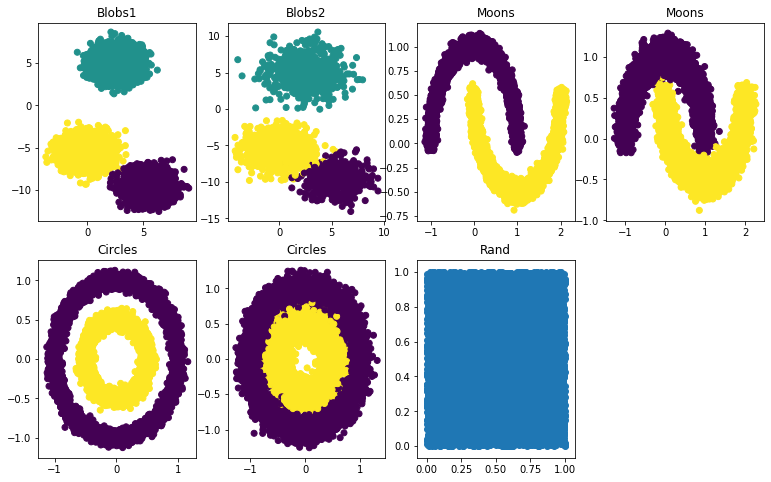

In [17]:
n_samples = 10000
random_state = 10
# centers = [(1,1),(5,5)]

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=[500,500,1000], cluster_std = [1.5,2,1.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [4]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [5]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [6]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    plt.figure(figsize = (12,7))
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

In [7]:
n_clusters = 3
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
n_c = 2
km_2 = KMeans(n_clusters = n_c, random_state = random_state)

In [8]:
y_pred = kmeans.fit_predict(Blobs1_X)
y_pred_2 = kmeans.fit_predict(Blobs2_X)
y_pred_3 = km_2.fit_predict(Moons1_X)
y_pred_4 = km_2.fit_predict(Moons2_X)
y_pred_5 = km_2.fit_predict(Circles1_X)
y_pred_6 = km_2.fit_predict(Circles2_X)

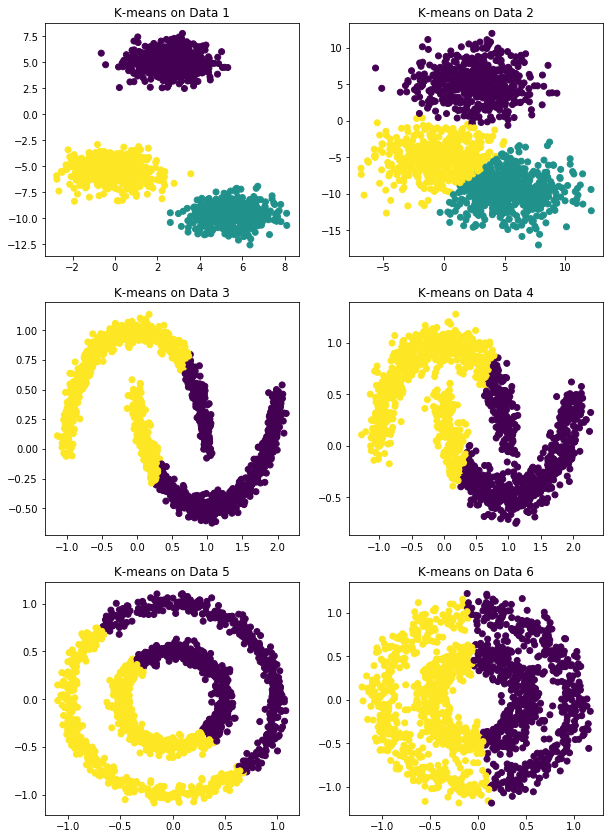

In [9]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) # true clusters
plt.title('K-means on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  # KMeans clusters
plt.title('K-means on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('K-means on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('K-means on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('K-means on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('K-means on Data 6')
plt.show()

In [10]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))

Rand-Index value on Blobs_1	 0.99911
Rand-Index value on Blobs_2	 0.92295
Rand-Index value on Moons_1	 0.62012
Rand-Index value on Moons_2	 0.62408
Rand-Index value on Circles_1	 0.49967
Rand-Index value on Circles_2	 0.49972



Ranking based on Rand-Index:
1. Blobs_1
2. Blobs_2
3. Moons_2
4. Moons_1
5. Circles_2
6. Circles_1

### 2. Agglomerative Clustering - Single Link

In [11]:
nc1 = 3
nc2 = 2
sl1 = AgglomerativeClustering(linkage="single", n_clusters=nc1)
sl2 = AgglomerativeClustering(linkage = 'single', n_clusters = nc2)
y_pred = sl1.fit_predict(Blobs1_X)
y_pred_2 = sl1.fit_predict(Blobs2_X)
y_pred_3 = sl2.fit_predict(Moons1_X)
y_pred_4 = sl2.fit_predict(Moons2_X)
y_pred_5 = sl2.fit_predict(Circles1_X)
y_pred_6 = sl2.fit_predict(Circles2_X)

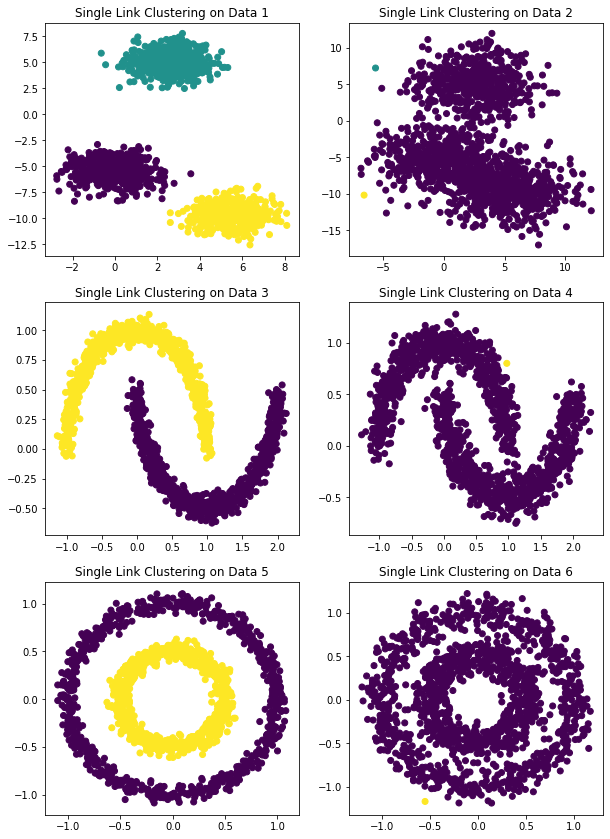

In [12]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) # true clusters
plt.title('Single Link Clustering on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  # KMeans clusters
plt.title('Single Link Clustering on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('Single Link Clustering on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('Single Link Clustering on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('Single Link Clustering on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('Single Link Clustering on Data 6')
plt.show()


Data1,3,5 are correctly clustered. In case of Data4,6 complete data is predicted to be one cluster, so only half of them are correctly clustered. In case of Data2 only one cluster out of three is correclty clustered.<br>
Ranking based on visualization:
1. Blobs1, Moons1, Circles1
2. Moons2, Circles2
3. Blobs2

In [13]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))

Rand-Index value on Blobs_1	 0.99911
Rand-Index value on Blobs_2	 0.33378
Rand-Index value on Moons_1	 1.0
Rand-Index value on Moons_2	 0.49967
Rand-Index value on Circles_1	 1.0
Rand-Index value on Circles_2	 0.49967



Ranking:
1. Moons1, Circles1
2. Blobs1
3. Circles2, Moons2
4. Blobs2


### 3. Agglomerative Clustering - Max Link

In [14]:
nc1 = 3
nc2 = 2
sl1 = AgglomerativeClustering(linkage="complete", n_clusters=nc1)
sl2 = AgglomerativeClustering(linkage = "complete", n_clusters = nc2)
y_pred = sl1.fit_predict(Blobs1_X)
y_pred_2 = sl1.fit_predict(Blobs2_X)
y_pred_3 = sl2.fit_predict(Moons1_X)
y_pred_4 = sl2.fit_predict(Moons2_X)
y_pred_5 = sl2.fit_predict(Circles1_X)
y_pred_6 = sl2.fit_predict(Circles2_X)

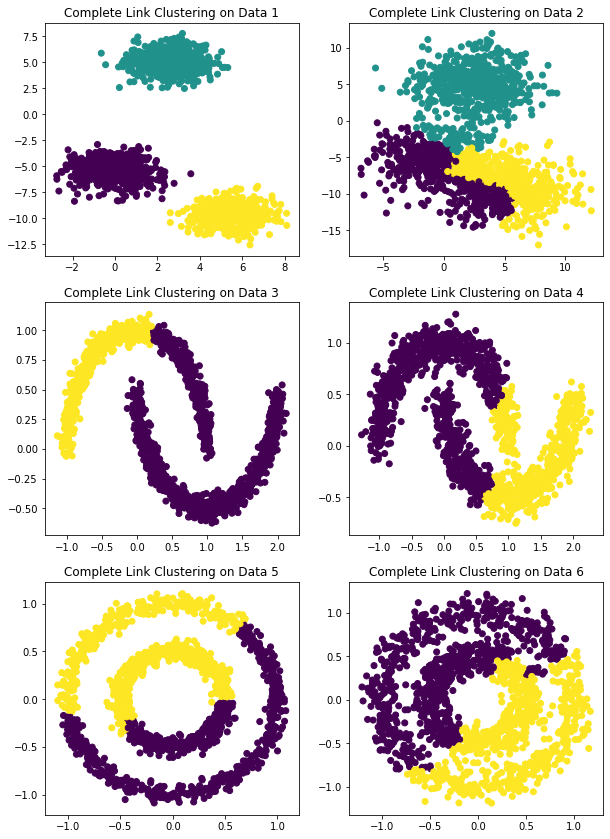

In [15]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) 
plt.title('Complete Link Clustering on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  
plt.title('Complete Link Clustering on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('Complete Link Clustering on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('Complete Link Clustering on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('Complete Link Clustering on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('Complete Link Clustering on Data 6')
plt.show()


Blobs1 is perfectly clustered, where as all other clusters are not so well clustered. Blobs2 has also been clustered but not perfect. Remaining clusters are not even close.<br>
Ranking:
1. Blobs1
2. Blobs2
3. Moons1
4. Circles1
5. Moons2
6. Circles2
<br>
The reason for Moons1 being on 3rd is almost 70 percent of data is correctly clustered. Circles1 and Moons2 are also around 60 percent. Circles2 misclustered half of the points.


In [ ]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))


Ranking:
1. Blobs1
2. Blobs2
3. Moons1
4. Moons2
5. Circles1
6. Circles2


### 4. Agglomerative Clustering - Average Link

In [17]:
nc1 = 3
nc2 = 2
sl1 = AgglomerativeClustering(linkage="average", n_clusters=nc1)
sl2 = AgglomerativeClustering(linkage = "average", n_clusters = nc2)
y_pred = sl1.fit_predict(Blobs1_X)
y_pred_2 = sl1.fit_predict(Blobs2_X)
y_pred_3 = sl2.fit_predict(Moons1_X)
y_pred_4 = sl2.fit_predict(Moons2_X)
y_pred_5 = sl2.fit_predict(Circles1_X)
y_pred_6 = sl2.fit_predict(Circles2_X)

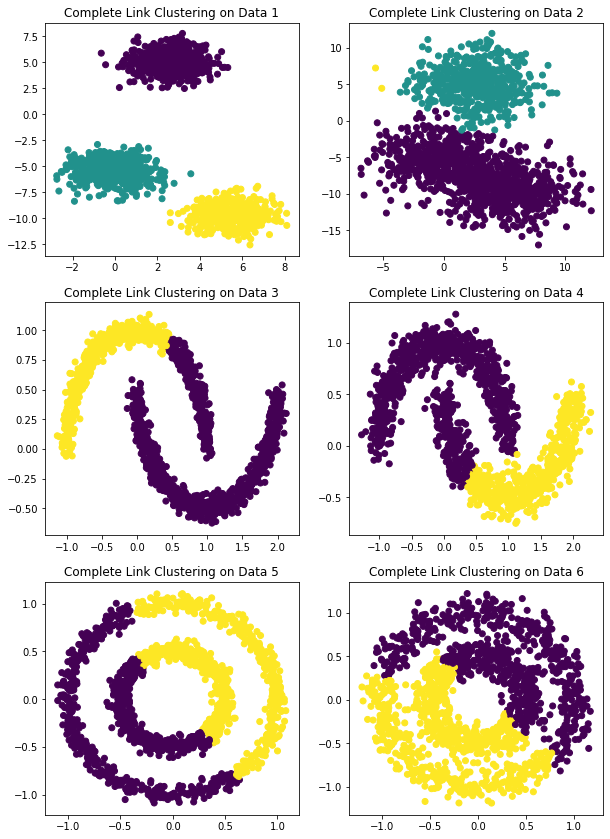

In [18]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) 
plt.title('Complete Link Clustering on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  
plt.title('Complete Link Clustering on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('Complete Link Clustering on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('Complete Link Clustering on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('Complete Link Clustering on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('Complete Link Clustering on Data 6')
plt.show()


Ranking:
1. Blobs1
2. Moons1, Moons2
3. Blobs2
4. Circles1, Circles2
<br>
From visualization I can clearly see that Blobs1 is well clustered like expected and will have high performance. All remaining data are not well clustered. Blobs2 was clustered unexpectedly because of two noise points whole data is clustered into three clusters where one cluster has just 2 points. All other data are clustered as expected. In moons data the performance is little bit more compared to circles and it would be around 70% where circles would have about 50%. Blobs2 should be in between moons and circles about 60-65%.

In [19]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))

Rand-Index value on Blobs_1	 0.99911
Rand-Index value on Blobs_2	 0.76366
Rand-Index value on Moons_1	 0.71323
Rand-Index value on Moons_2	 0.74576
Rand-Index value on Circles_1	 0.50041
Rand-Index value on Circles_2	 0.50508



Ranking
1. Blobs1
2. Blobs2
3. Moons2
4. Moons1
5. Circles1, Circles2


### 5. Density Based Clustering: DBSCAN

In [20]:
dbscan = DBSCAN(eps = 1, min_samples = 15)
dbscan2 = DBSCAN(eps = 0.09, min_samples = 5)
y_pred = dbscan.fit_predict(Blobs1_X)
y_pred_2 = dbscan.fit_predict(Blobs2_X)
y_pred_3 = dbscan2.fit_predict(Moons1_X)
y_pred_4 = dbscan2.fit_predict(Moons2_X)
y_pred_5 = dbscan2.fit_predict(Circles1_X)
y_pred_6 = dbscan2.fit_predict(Circles2_X)

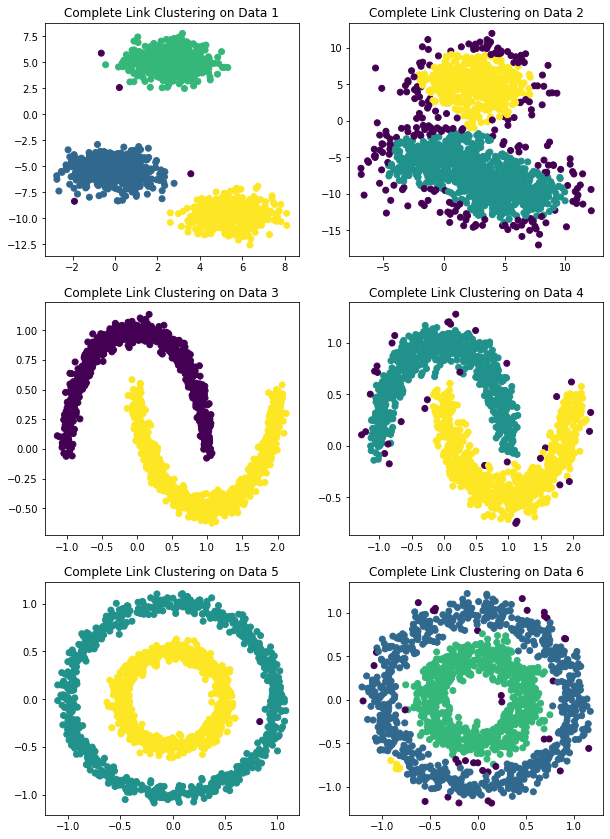

In [21]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) 
plt.title('Complete Link Clustering on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  
plt.title('Complete Link Clustering on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('Complete Link Clustering on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('Complete Link Clustering on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('Complete Link Clustering on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('Complete Link Clustering on Data 6')
plt.show()


Ranking: <br>
1. Moons1
2. Circles1
3. Blobs1
4. Moons2
5. Circles2
6. Blobs2
<br>
Moons1 was clustured perfectly. All other clusters are well fitted with an exception of Blobs2 where it found only two clusters. Remaining clusters are well fitted with performance of atleast 95%.

In [22]:
print('No. of noise point in Blobs1 :',np.sum(y_pred == -1))
print('No. of noise point in Blobs2 :',np.sum(y_pred_2 == -1))
print('No. of noise point in Moons1 :',np.sum(y_pred_3 == -1))
print('No. of noise point in Moons2 :',np.sum(y_pred_4 == -1))
print('No. of noise point in Circles1 :',np.sum(y_pred_5 == -1))
print('No. of noise point in Circles2 :',np.sum(y_pred_6 == -1))

No. of noise point in Blobs1 : 4
No. of noise point in Blobs2 : 232
No. of noise point in Moons1 : 0
No. of noise point in Moons2 : 33
No. of noise point in Circles1 : 1
No. of noise point in Circles2 : 36


In [23]:
for i in range(0,1500):
    if(y_pred[i] == -1):
        y_pred[i] = 3
    if(y_pred_2[i] == -1):
        y_pred_2[i] = 3
    if(y_pred_3[i] == -1):
        y_pred_3[i] = 2
    if(y_pred_4[i] == -1):
        y_pred_4[i] = 2
    if(y_pred_5[i] == -1):
        y_pred_5[i] = 2
    if(y_pred_6[i] == -1):
        y_pred_6[i] = 2

In [24]:
sum(y_pred == 3)

4

In [25]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))

Rand-Index value on Blobs_1	 0.99734
Rand-Index value on Blobs_2	 0.73096
Rand-Index value on Moons_1	 1.0
Rand-Index value on Moons_2	 0.97565
Rand-Index value on Circles_1	 0.99933
Rand-Index value on Circles_2	 0.96318



Ranking:
1. Moons1
2. Circles1
3. Blobs1
4. Moons2
5. Circles2
6. Blobs2

### 6. Spectral Clustering

In [26]:
spect = SpectralClustering(
        n_clusters=3, eigen_solver='arpack',
        affinity="nearest_neighbors")
spect2 = SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors")
y_pred = spect.fit_predict(Blobs1_X)
y_pred_2 = spect.fit_predict(Blobs2_X)
y_pred_3 = spect2.fit_predict(Moons1_X)
y_pred_4 = spect2.fit_predict(Moons2_X)
y_pred_5 = spect2.fit_predict(Circles1_X)
y_pred_6 = spect2.fit_predict(Circles2_X)

/users/PES0801/vatsav/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/users/PES0801/vatsav/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/users/PES0801/vatsav/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


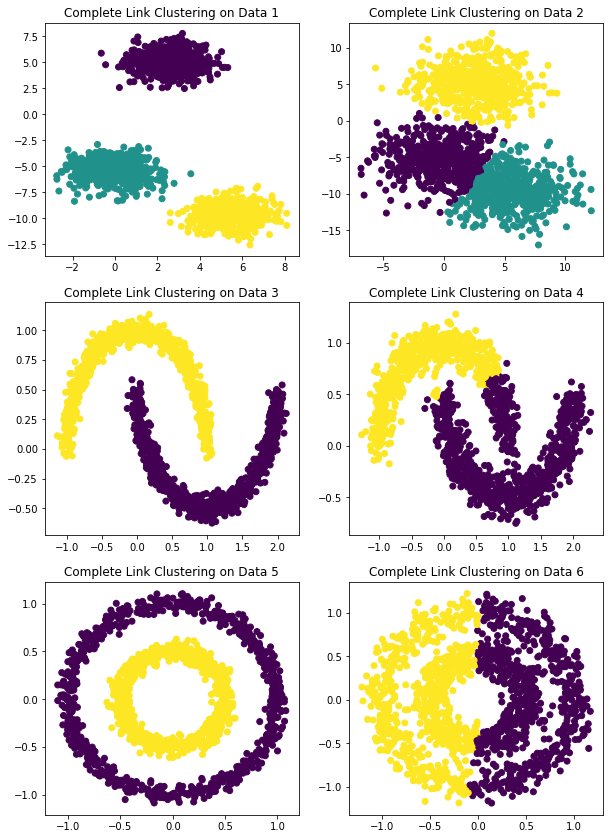

In [27]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) 
plt.title('Complete Link Clustering on Data 1')
plt.subplot(6,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  
plt.title('Complete Link Clustering on Data 2')
plt.subplot(6,2,3)
plt.scatter(Moons1_X[:,0], Moons1_X[:,1], c = y_pred_3)
plt.title('Complete Link Clustering on Data 3')
plt.subplot(6,2,4)
plt.scatter(Moons2_X[:,0], Moons2_X[:,1], c = y_pred_4)
plt.title('Complete Link Clustering on Data 4')
plt.subplot(6,2,5)
plt.scatter(Circles1_X[:,0],Circles1_X[:,1], c = y_pred_5)
plt.title('Complete Link Clustering on Data 5')
plt.subplot(6,2,6)
plt.scatter(Circles2_X[:,0],Circles2_X[:,1], c = y_pred_6)
plt.title('Complete Link Clustering on Data 6')
plt.show()


The output of the algorithm is as expected.
Ranking:
1. Blobs1, Moons1, Circles1
2. Blobs2
3. Moons2
4. Circles2

As the clusters in Moons2, Circles2 are not well seperated and of many noise points the graphs which makes the affinity between the two components of graph not so well defined. This makes the cut difficult in case of these two. Remaining plots are well defined and seperated which makes the algorithm very east to segregate.

In [28]:
print('Rand-Index value on Blobs_1\t',rand_index(y_pred,Blobs1_y).round(5))
print('Rand-Index value on Blobs_2\t',rand_index(y_pred_2,Blobs2_y).round(5))
print('Rand-Index value on Moons_1\t',rand_index(y_pred_3,Moons1_y).round(5))
print('Rand-Index value on Moons_2\t',rand_index(y_pred_4,Moons2_y).round(5))
print('Rand-Index value on Circles_1\t',rand_index(y_pred_5,Circles1_y).round(5))
print('Rand-Index value on Circles_2\t',rand_index(y_pred_6,Circles2_y).round(5))

Rand-Index value on Blobs_1	 0.99911
Rand-Index value on Blobs_2	 0.91759
Rand-Index value on Moons_1	 1.0
Rand-Index value on Moons_2	 0.78866
Rand-Index value on Circles_1	 1.0
Rand-Index value on Circles_2	 0.49967



Ranking:
1. Moons1, Circles1, Blobs1
2. Blobs2
3. Moons2
4. Circles2



### 7. Clustering Tendency

In [29]:
print("Hopkins statistic for Blobs1 :",hopkins(Blobs1_X))
print("Hopkins statistic for Blobs2 :",hopkins(Blobs2_X))
print("Hopkins statistic for Moons1 :",hopkins(Moons1_X))
print("Hopkins statistic for Moons2 :",hopkins(Moons2_X))
print("Hopkins statistic for Circles1 :",hopkins(Circles1_X))
print("Hopkins statistic for Circles2 :",hopkins(Circles2_X))
print("Hopkins statistic for Rand :",hopkins(Rand_X))


Hopkins statistic for Blobs1 : 0.9454104138212834
Hopkins statistic for Blobs2 : 0.8099959641866818
Hopkins statistic for Moons1 : 0.9222202914023732
Hopkins statistic for Moons2 : 0.8906287519544384
Hopkins statistic for Circles1 : 0.8258306556443726
Hopkins statistic for Circles2 : 0.7442977914973709
Hopkins statistic for Rand : 0.6121365660721705



Ranking:
1. Blobs1
2. Moons1
3. Moons2
4. Blobs2
5. Circles1
6. Circles2
7. Rand


In [40]:
gmm = KMeans(n_clusters = 4)
gmm_pred = gmm.fit_predict(Blobs1_X)

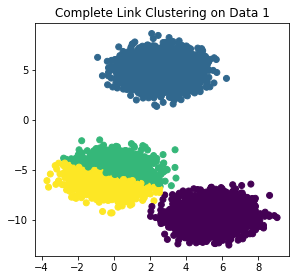

In [41]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(6,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=gmm_pred) 
plt.title('Complete Link Clustering on Data 1')
plt.show()

In [30]:
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
k_pred = kmeans.fit_predict(Rand_X)

gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
gmm_pred = gmm.fit_predict(Rand_X)

s_l = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
sl_pred = s_l.fit_predict(Rand_X)

c_l = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
cl_pred = c_l.fit_predict(Rand_X)

a_l = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
al_pred = a_l.fit_predict(Rand_X)

db = DBSCAN(eps=0.034, min_samples=4)
db_pred = db.fit_predict(Rand_X)

spec = SpectralClustering(
        n_clusters=3, eigen_solver='arpack',
        affinity="nearest_neighbors")
sp_pred = spec.fit_predict(Rand_X)


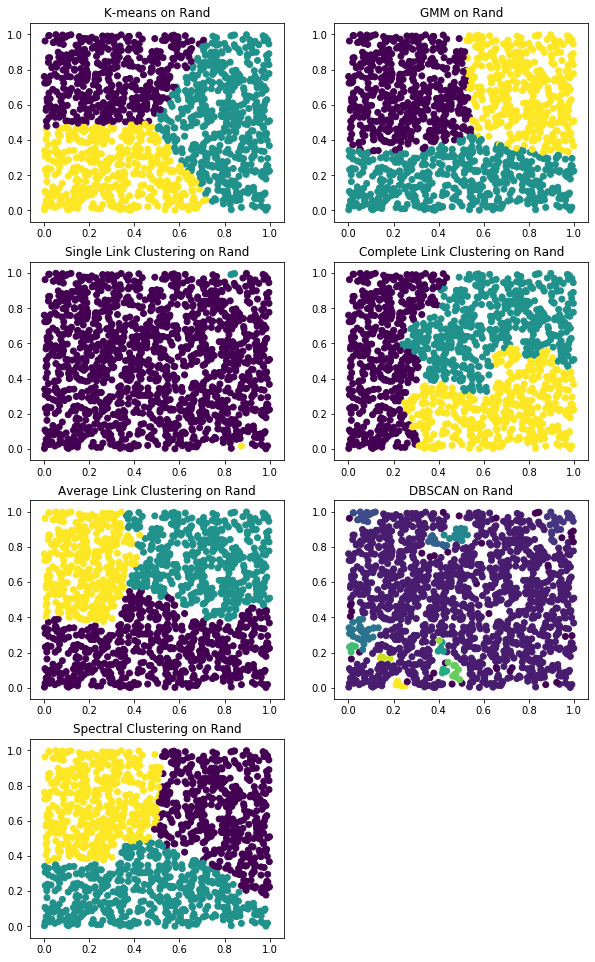

In [31]:
fig, ax = plt.subplots(figsize=(10,30))
plt.subplot(7,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=k_pred) 
plt.title('K-means on Rand')
plt.subplot(7,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=gmm_pred)  
plt.title('GMM on Rand')
plt.subplot(7,2,3)
plt.scatter(Rand_X[:,0], Rand_X[:,1], c = sl_pred)
plt.title('Single Link Clustering on Rand')
plt.subplot(7,2,4)
plt.scatter(Rand_X[:,0], Rand_X[:,1], c = cl_pred)
plt.title('Complete Link Clustering on Rand')
plt.subplot(7,2,5)
plt.scatter(Rand_X[:,0],Rand_X[:,1], c = al_pred)
plt.title('Average Link Clustering on Rand')
plt.subplot(7,2,6)
plt.scatter(Rand_X[:,0],Rand_X[:,1], c = db_pred)
plt.title('DBSCAN on Rand')
plt.subplot(7,2,7)
plt.scatter(Rand_X[:,0],Rand_X[:,1], c = sp_pred)
plt.title('Spectral Clustering on Rand')
plt.show()


Reason for clusters:
1. Kmeans obviously seperated the graph into three parts as the seperation between the centers will be maximum only in that case.
2. In GMM it is same as KMeans but the graph is based on gaussian distribution which makes the graph to be that way.
3. Single link clustering, as all the points are so close all gets clustered into one cluster and finally left with 3 clusters with each having 1 and 2 points respectively.
4. As the Max link and average link works even on noise data, they ended up determining 3 clusters with certain shapes.
5. As the DBSCAN tries to scan points which are close to each other and finding core points in the nieghbours all the points are almost defined as one cluster and remaining are classified as noise points.
6.  Spectral clustering also works same as the knn.


### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [32]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [33]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [34]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [35]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [36]:
Cancer_X.shape

(569, 30)

In [37]:
Cancer_y.shape

(569,)

In [32]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=42); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Blobs2_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Blobs2_X)  #Computing SSE
    print("SSE for k =",i,":", round(score[i],2)) #Printing SSE

SSE for k = 2 : 26022.86
SSE for k = 3 : 10393.65
SSE for k = 4 : 8910.42
SSE for k = 5 : 7539.05
SSE for k = 6 : 6550.15
SSE for k = 7 : 5639.7
SSE for k = 8 : 4972.04
SSE for k = 9 : 4570.33
SSE for k = 10 : 4113.96
SSE for k = 11 : 3767.96
SSE for k = 12 : 3539.35
SSE for k = 13 : 3280.22
SSE for k = 14 : 3064.04
SSE for k = 15 : 2883.37
SSE for k = 16 : 2680.64
SSE for k = 17 : 2543.85
SSE for k = 18 : 2433.25
SSE for k = 19 : 2316.78
SSE for k = 20 : 2194.55
SSE for k = 21 : 2119.28
SSE for k = 22 : 2009.63
SSE for k = 23 : 1932.41
SSE for k = 24 : 1848.74
SSE for k = 25 : 1755.24
SSE for k = 26 : 1717.98
SSE for k = 27 : 1645.01
SSE for k = 28 : 1583.36
SSE for k = 29 : 1561.09
SSE for k = 30 : 1493.99
SSE for k = 31 : 1455.92
SSE for k = 32 : 1412.03
SSE for k = 33 : 1368.7
SSE for k = 34 : 1343.06
SSE for k = 35 : 1308.08
SSE for k = 36 : 1267.73
SSE for k = 37 : 1231.87
SSE for k = 38 : 1200.14
SSE for k = 39 : 1165.8
SSE for k = 40 : 1146.63


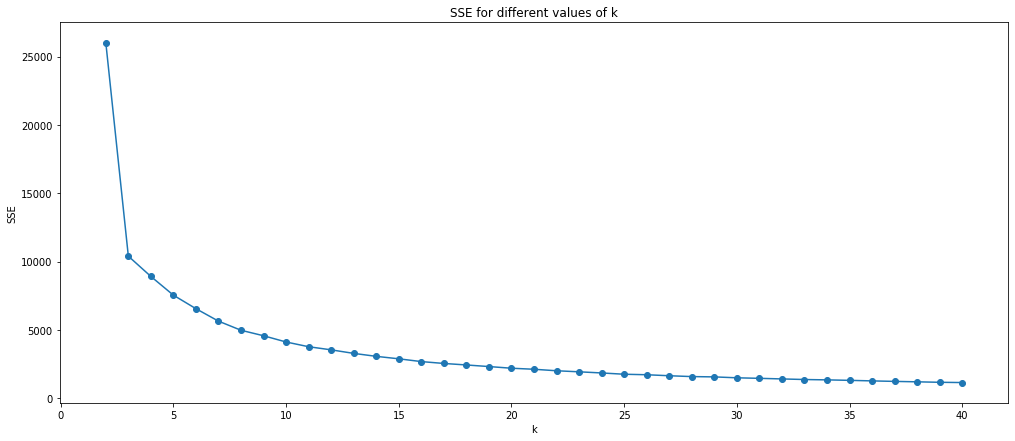

In [33]:
plt.figure(figsize = (17,7))
plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
k_pred = kmeans.fit_predict(Cancer_X)

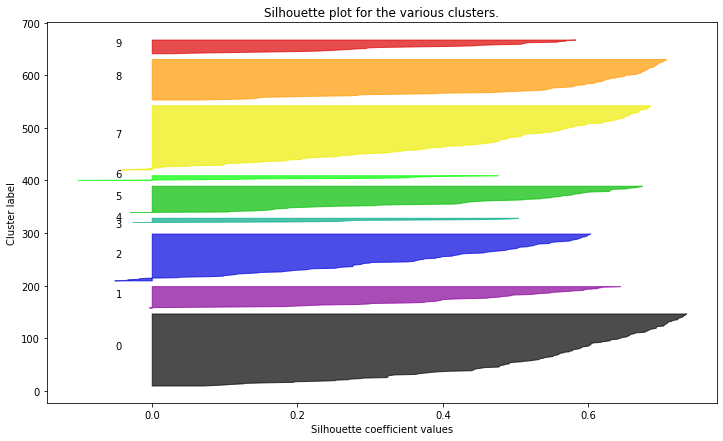

In [41]:
silhouette(Cancer_X,k_pred)

In [42]:
rand_index(Cancer_y,k_pred)

0.5763385232307731

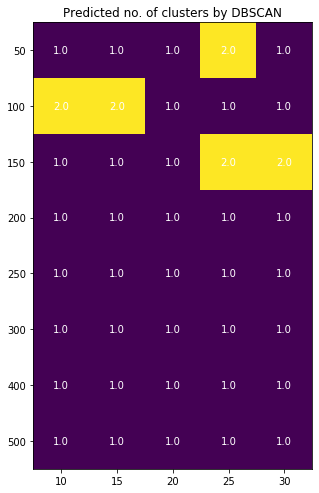

In [43]:
eps = [50, 100, 150, 200, 250, 300, 400, 500]
m_s = [10, 15, 20, 25, 30]
n_clusters = np.zeros((8,5))
for e in range(0,8):
    for m in range(0,5):
        dbscan = DBSCAN(eps = eps[e], min_samples = m_s[m])
        d_pred = dbscan.fit_predict(Cancer_X)
        n_clusters[e][m] = max(d_pred)+1
fig, ax = plt.subplots(figsize = (5,10))
im = ax.imshow(n_clusters)
for i in range(len(eps)):
    for j in range(len(m_s)):
        text = ax.text(j, i, n_clusters[i, j],ha="center", va="center", color="w")
ax.set_xticklabels([0,10, 15, 20, 25, 30])
ax.set_yticklabels([0,50, 100, 150, 200, 250, 300, 400, 500])
ax.set
plt.title('Predicted no. of clusters by DBSCAN')
plt.show()

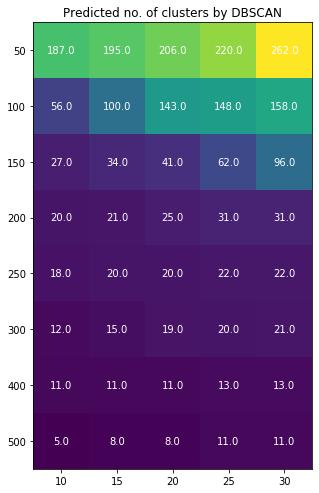

In [44]:
eps = [50, 100, 150, 200, 250, 300, 400, 500]
m_s = [10, 15, 20, 25, 30]
n_clusters = np.zeros((8,5))
for e in range(0,8):
    for m in range(0,5):
        dbscan = DBSCAN(eps = eps[e], min_samples = m_s[m])
        d_pred = dbscan.fit_predict(Cancer_X)
        n_clusters[e][m] = sum(d_pred == -1)
fig, ax = plt.subplots(figsize = (5,10))
im = ax.imshow(n_clusters)
for i in range(len(eps)):
    for j in range(len(m_s)):
        text = ax.text(j, i, n_clusters[i, j],ha="center", va="center", color="w")
ax.set_xticklabels([0,10, 15, 20, 25, 30])
ax.set_yticklabels([0,50, 100, 150, 200, 250, 300, 400, 500])
plt.title('Predicted no. of clusters by DBSCAN')
plt.show()

In [45]:
dbscan = DBSCAN(eps = 100, min_samples = 10)
d_pred = dbscan.fit_predict(Cancer_X)
for i in range(len(d_pred)):
    if(d_pred[i] == -1):
        d_pred[i] = 2
print(rand_index(Cancer_y,d_pred))

0.6680115844451595


From the above tables we can see that when eps = 100, neighbors = 10, DBSCAN performs very good.